  Road_Conditions Weather_Conditions  Time_of_Day  Start_Lat   Start_Lng
0             Dry              Clear           11  34.168280  -98.848401
1             Wet              Clear           15  48.562035 -115.216704
2             Dry              Clear           21  43.040257  -99.772886
3             Dry               Rain            4  40.087726  -93.204833
4             Dry              Clear           17  41.153016  -74.780140
Accident hotspots map saved as 'accident_hotspots.html'


C:\Users\DELL\AppData\Local\Temp\ipykernel_984\1355538680.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_Conditions', data=data, palette='viridis')


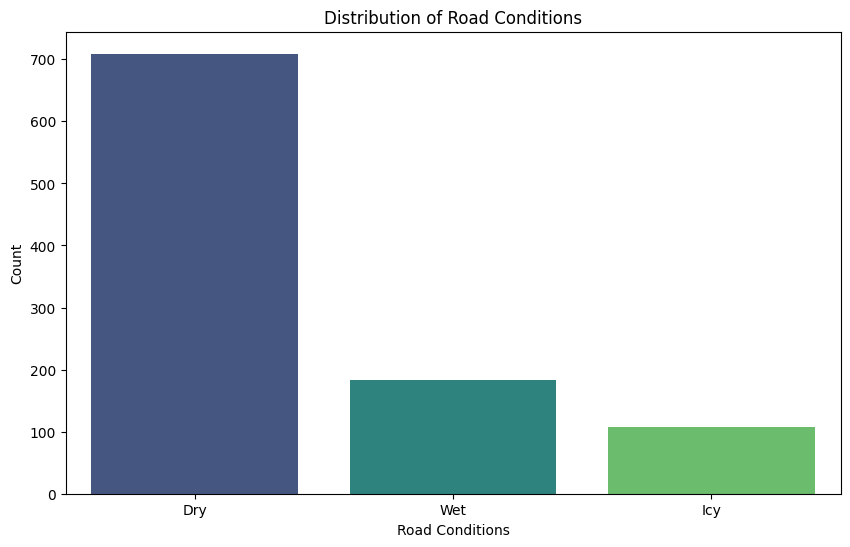

C:\Users\DELL\AppData\Local\Temp\ipykernel_984\1355538680.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Conditions', data=data, palette='magma')


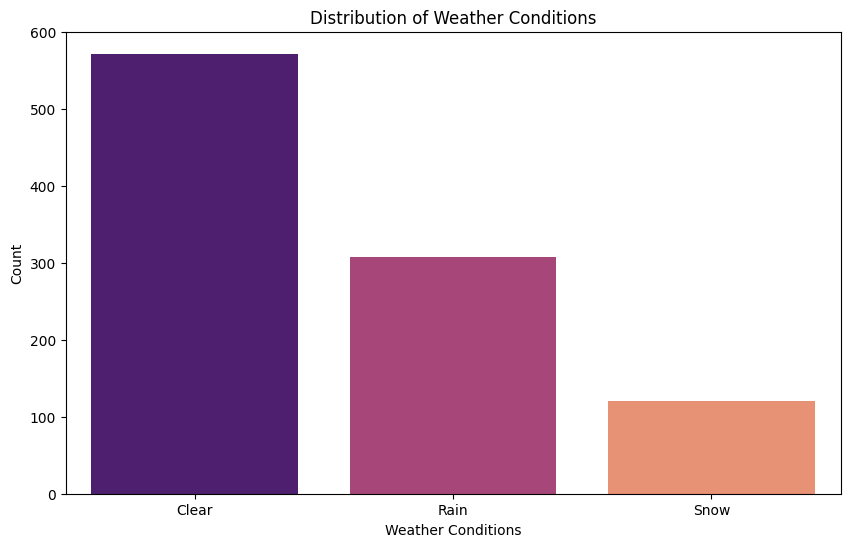

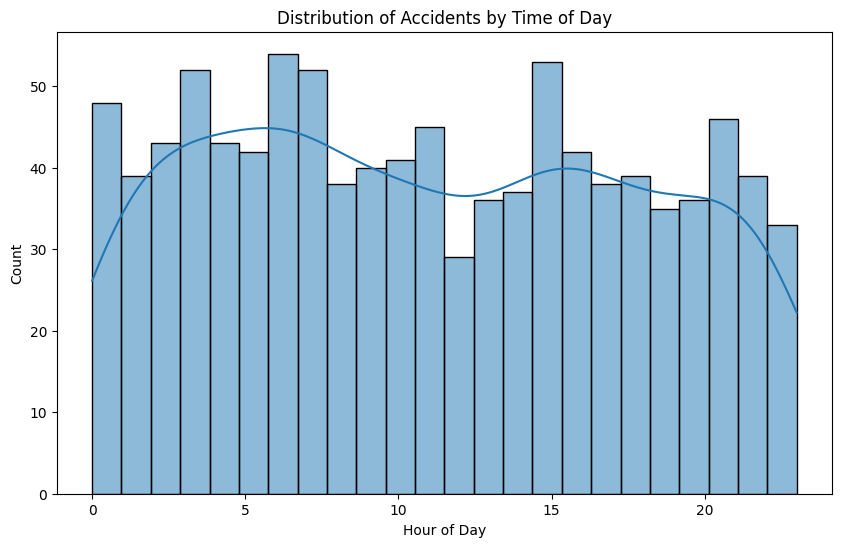

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Generate synthetic data for traffic accidents
np.random.seed(0)
n_accidents = 1000

# Generate random road conditions
road_conditions = np.random.choice(['Dry', 'Wet', 'Icy'], size=n_accidents, p=[0.7, 0.2, 0.1])

# Generate random weather conditions
weather_conditions = np.random.choice(['Clear', 'Rain', 'Snow'], size=n_accidents, p=[0.6, 0.3, 0.1])

# Generate random time of day (hour)
time_of_day = np.random.randint(0, 24, size=n_accidents)

# Generate random latitude and longitude (for accident hotspots)
latitude = np.random.uniform(30, 50, size=n_accidents)
longitude = np.random.uniform(-120, -70, size=n_accidents)

# Create a DataFrame
data = pd.DataFrame({
    'Road_Conditions': road_conditions,
    'Weather_Conditions': weather_conditions,
    'Time_of_Day': time_of_day,
    'Start_Lat': latitude,
    'Start_Lng': longitude
})

# Display the first few rows of the dataset
print(data.head())

# Data Analysis and Visualization
# Visualize accident hotspots using Folium
base_map = folium.Map(location=[np.mean(latitude), np.mean(longitude)], zoom_start=5)

# Create a HeatMap layer
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(base_map)

# Save the map as an HTML file
base_map.save('accident_hotspots.html')
print("Accident hotspots map saved as 'accident_hotspots.html'")

# Visualize road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Conditions', data=data, palette='viridis')
plt.title('Distribution of Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Count')
plt.show()

# Visualize weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', data=data, palette='magma')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

# Visualize accidents by time of day
plt.figure(figsize=(10, 6))
sns.histplot(data['Time_of_Day'], bins=24, kde=True)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()